In [1]:
from tensorflow.keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, SeparableConv1D, MaxPool2D, LeakyReLU, Dense, Activation, Flatten, InputLayer, Dropout
import tensorflow
import pandas as pd
import numpy as np
from numpy import array
from numpy import hstack
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

In [2]:
# loading the dataset
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [3]:
#visualizing the data
print('MNIST Dataset Shape:')
print('X_train: ' + str(X_train.shape))
print('Y_train: ' + str(Y_train.shape))
print('X_test:  '  + str(X_test.shape))
print('Y_test:  '  + str(Y_test.shape))
X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)

MNIST Dataset Shape:
X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


In [4]:
Y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [5]:
# creating one hot encoded values
one_hot_encoded_Y_train = pd.get_dummies(Y_train)

one_hot_encoded_Y_test = pd.get_dummies(Y_test)

one_hot_encoded_Y_test.shape

In [8]:
#setting a variable for the input of the neural network
shape = X_train.shape[1:]
shape

(28, 28)

In [9]:
# We will set the range of possible values between 0 and 1 as it will increase accuracy.
X_train = X_train.astype('float32')/255.0

X_test = X_test.astype('float32')/255.0

In [25]:
# Creating a simple artificial neural network
model_ann = Sequential()
model_ann.add(Flatten(input_shape=(28,28)))
model_ann.add(Dropout(0.1))
model_ann.add(Dense(20, activation='relu'))
model_ann.add(Dense(10, activation='softmax'))


In [26]:
model_ann.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dropout_1 (Dropout)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 20)                15700     
                                                                 
 dense_7 (Dense)             (None, 10)                210       
                                                                 
Total params: 15,910
Trainable params: 15,910
Non-trainable params: 0
_________________________________________________________________


In [27]:
#compiling the network
model_ann.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['acc'])

In [28]:
#training the network
model_ann.fit(X_train,one_hot_encoded_Y_train,epochs=300,batch_size=128)


Epoch 1/300
469/469 [==============================] - 1s 1ms/step - loss: 0.6010 - acc: 0.8318
Epoch 2/300
469/469 [==============================] - 1s 1ms/step - loss: 0.2953 - acc: 0.9154
Epoch 3/300
469/469 [==============================] - 1s 1ms/step - loss: 0.2561 - acc: 0.9274
Epoch 4/300
469/469 [==============================] - 1s 1ms/step - loss: 0.2321 - acc: 0.9341
Epoch 5/300
469/469 [==============================] - 1s 1ms/step - loss: 0.2157 - acc: 0.9378
Epoch 6/300
469/469 [==============================] - 1s 1ms/step - loss: 0.2032 - acc: 0.9413
Epoch 7/300
469/469 [==============================] - 1s 1ms/step - loss: 0.1919 - acc: 0.9449
Epoch 8/300
469/469 [==============================] - 1s 1ms/step - loss: 0.1841 - acc: 0.9463
Epoch 9/300
469/469 [==============================] - 1s 1ms/step - loss: 0.1780 - acc: 0.9481
Epoch 10/300
469/469 [==============================] - 1s 1ms/step - loss: 0.1706 - acc: 0.9514
Epoch 11/300
469/469 [=================

469/469 [==============================] - 1s 1ms/step - loss: 0.0863 - acc: 0.9731
Epoch 86/300
469/469 [==============================] - 1s 2ms/step - loss: 0.0858 - acc: 0.9731
Epoch 87/300
469/469 [==============================] - 1s 2ms/step - loss: 0.0856 - acc: 0.9730
Epoch 88/300
469/469 [==============================] - 1s 2ms/step - loss: 0.0834 - acc: 0.9735
Epoch 89/300
469/469 [==============================] - 1s 2ms/step - loss: 0.0852 - acc: 0.9734
Epoch 90/300
469/469 [==============================] - 1s 1ms/step - loss: 0.0845 - acc: 0.9731
Epoch 91/300
469/469 [==============================] - 1s 1ms/step - loss: 0.0851 - acc: 0.9735
Epoch 92/300
469/469 [==============================] - 1s 2ms/step - loss: 0.0828 - acc: 0.9741
Epoch 93/300
469/469 [==============================] - 1s 1ms/step - loss: 0.0858 - acc: 0.9729
Epoch 94/300
469/469 [==============================] - 1s 1ms/step - loss: 0.0839 - acc: 0.9739
Epoch 95/300
469/469 [=====================

469/469 [==============================] - 1s 1ms/step - loss: 0.0740 - acc: 0.9764
Epoch 169/300
469/469 [==============================] - 1s 1ms/step - loss: 0.0731 - acc: 0.9763
Epoch 170/300
469/469 [==============================] - 1s 1ms/step - loss: 0.0749 - acc: 0.9756
Epoch 171/300
469/469 [==============================] - 1s 1ms/step - loss: 0.0740 - acc: 0.9757
Epoch 172/300
469/469 [==============================] - 1s 1ms/step - loss: 0.0745 - acc: 0.9755
Epoch 173/300
469/469 [==============================] - 1s 2ms/step - loss: 0.0720 - acc: 0.9764
Epoch 174/300
469/469 [==============================] - 1s 1ms/step - loss: 0.0730 - acc: 0.9762
Epoch 175/300
469/469 [==============================] - 1s 1ms/step - loss: 0.0747 - acc: 0.9760
Epoch 176/300
469/469 [==============================] - 1s 1ms/step - loss: 0.0743 - acc: 0.9760
Epoch 177/300
469/469 [==============================] - 1s 1ms/step - loss: 0.0738 - acc: 0.9759
Epoch 178/300
469/469 [===========

469/469 [==============================] - 1s 1ms/step - loss: 0.0696 - acc: 0.9765
Epoch 252/300
469/469 [==============================] - 1s 1ms/step - loss: 0.0692 - acc: 0.9777
Epoch 253/300
469/469 [==============================] - 1s 1ms/step - loss: 0.0703 - acc: 0.9767
Epoch 254/300
469/469 [==============================] - 1s 1ms/step - loss: 0.0672 - acc: 0.9779
Epoch 255/300
469/469 [==============================] - 1s 1ms/step - loss: 0.0702 - acc: 0.9781
Epoch 256/300
469/469 [==============================] - 1s 1ms/step - loss: 0.0662 - acc: 0.9788
Epoch 257/300
469/469 [==============================] - 1s 1ms/step - loss: 0.0710 - acc: 0.9772
Epoch 258/300
469/469 [==============================] - 1s 1ms/step - loss: 0.0707 - acc: 0.9767
Epoch 259/300
469/469 [==============================] - 1s 1ms/step - loss: 0.0701 - acc: 0.9765
Epoch 260/300
469/469 [==============================] - 1s 1ms/step - loss: 0.0705 - acc: 0.9769
Epoch 261/300
469/469 [===========

In [29]:
#testing the network on testing data
loss, accuracy= model_ann.evaluate(X_test, one_hot_encoded_Y_test, verbose = 0)

print(f'Accuracy: {accuracy*100}')

Accuracy: 96.60999774932861


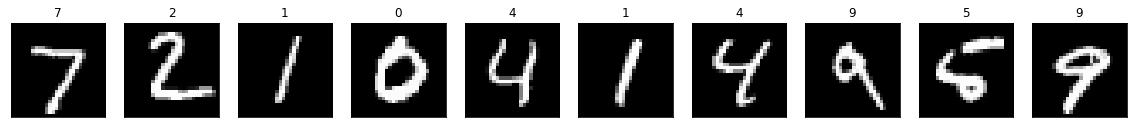

In [33]:
#visualizing the results
predictions = model_ann.predict(X_test)

predictions = np.argmax(predictions, axis=1)

fig, axes = plt.subplots(ncols=10, sharex=False,
                         sharey=True, figsize=(20, 4))
for i in range(10):
    axes[i].set_title(predictions[i])
    axes[i].imshow(X_test[i], cmap='gray')
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
plt.show()